<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшениие-выборки" data-toc-modified-id="Уменьшениие-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшениие выборки</a></span></li><li><span><a href="#Изменение-порога-классификации" data-toc-modified-id="Изменение-порога-классификации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога классификации</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Целью** настоящей работы является выявление модели, позволяющей прогнозировать отток клиентов банка со значением f1-меры не менее 0.59%.

**Описание данных**:

Признаки
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата
 
Целевой признак
 - Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#v2: from sklearn.linear_model import LogisticRegression
#v2: from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import confusion_matrix
#v2: from sklearn.metrics import precision_score
#v2: from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r'C:\Users\Танька\first-repo\Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  int64  
 11  IsActiveMember   10001 non-null  int64  
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски присутствуют только в данных о продолжительности сотрудничества клиента с банком. 

Типы переменных корректировать не требуется.

In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10001.000000,1.000100e+04,10001.000000,10001.000000,9091.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.999900,1.569093e+07,650.542946,38.920708,4.997690,76491.254442,1.530147,0.705529,0.515048,100084.050554,0.203680
std,2887.184182,7.193531e+04,96.658818,10.487851,2.894723,62396.592134,0.581649,0.455827,0.499798,57510.948127,0.402754
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.000000,1.562852e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50974.570000,0.000000
50%,5001.000000,1.569073e+07,652.000000,37.000000,5.000000,97208.460000,1.000000,1.000000,1.000000,100187.430000,0.000000
75%,7501.000000,1.575323e+07,718.000000,44.000000,7.000000,127649.640000,2.000000,1.000000,1.000000,149384.430000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Рассмотрим подробнее признаки с большим диапазоном данных:

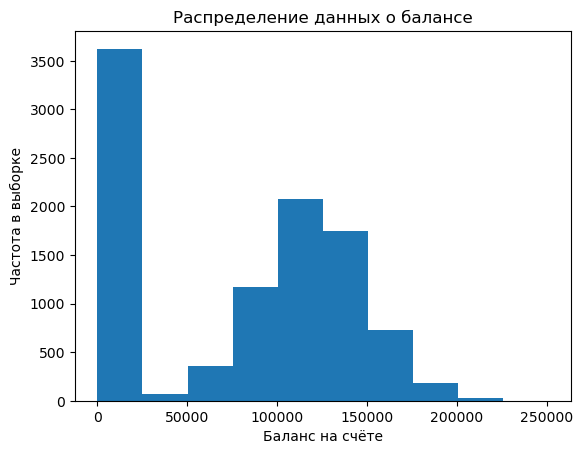

In [4]:
data['Balance'].plot(kind='hist', title='Распределение данных о балансе').set(
xlabel='Баланс на счёте', ylabel='Частота в выборке');

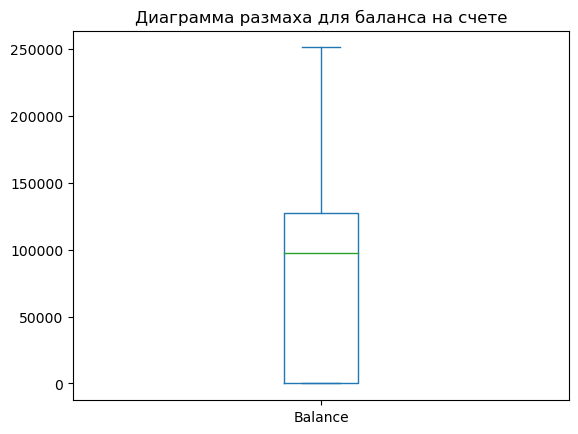

In [5]:
data['Balance'].plot.box(title='Диаграмма размаха для баланса на счете');

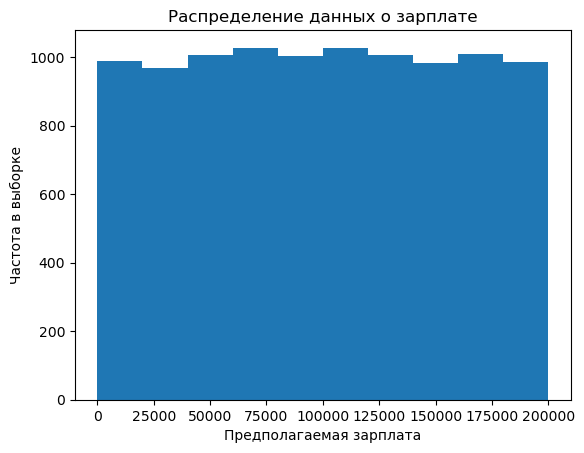

In [6]:
data['EstimatedSalary'].plot(kind='hist', title='Распределение данных о зарплате').set(
xlabel='Предполагаемая зарплата', ylabel='Частота в выборке');

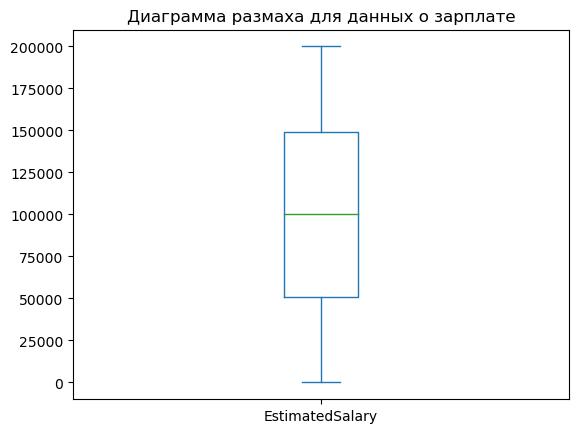

In [7]:
data['EstimatedSalary'].plot.box(title='Диаграмма размаха для данных о зарплате');

Выбросов в данных нет.

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
data.duplicated().sum()

1

Дубликаты в данных отсутствуют.

Самостоятельно заполнить пропуски с данными о том, как долго человек является клиентом банка, невозможно. Поэтому избавимся от строк с пропусками.

In [10]:
data = data.dropna(subset=['Tenure'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Также удалим столбцы с неинформативными признаками. К ним относятся RowNumber (индекс строки в данных), CustomerId (уникальный идентификатор клиента) и Surname (фамилия).

In [11]:
#v2:
data = data.drop(columns=['RowNumber', 'CustomerId','Surname'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


Разделим выборку на обучающую, тестовую и валидационную и проверим размеры получившихся датасетов:

In [12]:
#v2:
features = data.drop('Exited', axis=1)
target = data['Exited']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.50, random_state=12345)

print(f'Размер обучающих выборок: признаки - {features_train.shape}, таргет - {target_train.shape}')
print(f'Размер тестовых выборок: признаки - {features_test.shape}, таргет - {target_test.shape}') 
print(f'Размер валидационных выборок: признаки - {features_valid.shape}, таргет - {target_valid.shape}')
                     
#v1:
#train_df, test_df = train_test_split(data, test_size=0.25, random_state=12345)
#train_df, validation_df = train_test_split(data, test_size=0.25, random_state=12345)
#print(f'Размер обучающей выборки: {train_df.shape}')
#print(f'Размер тестовой выборки: {test_df.shape}') 
#print(f'Размер валидационной выборки: {validation_df.shape}')

Размер обучающих выборок: признаки - (5454, 10), таргет - (5454,)
Размер тестовых выборок: признаки - (1818, 10), таргет - (1818,)
Размер валидационных выборок: признаки - (1819, 10), таргет - (1819,)


In [13]:
encoder = OrdinalEncoder()

#v2:
encoder.fit(features_train[['Geography','Gender']])
features_train[['Geography','Gender']] = encoder.transform(features_train[['Geography','Gender']])
features_test[['Geography','Gender']] = encoder.transform(features_test[['Geography','Gender']])
features_valid[['Geography','Gender']] = encoder.transform(features_valid[['Geography','Gender']])


#v1 - data = pd.DataFrame(encoder.fit_transform(data, columns=data.columns)
features_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9344,727,0.0,0.0,28,2.0,110997.76,1,1,0,101433.76
3796,537,0.0,1.0,26,7.0,106397.75,1,0,0,103563.23
7462,610,0.0,1.0,40,9.0,0.00,1,1,1,149602.54
1508,576,0.0,1.0,36,6.0,0.00,2,1,1,48314.00
4478,549,0.0,1.0,31,4.0,0.00,2,0,1,25684.85


Стандартизируем признаки, чтобы привести их к одному масштабу:

In [14]:
scaler = StandardScaler()
scaler.fit(features_train.values)
sc_features_train = scaler.transform(features_train)
sc_features_valid = scaler.transform(features_valid)
sc_features_test = scaler.transform(features_test)

D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [15]:
sc_features_train = pd.DataFrame(sc_features_train, index=features_train.index, columns = features_train.columns)
sc_features_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9344,0.809075,-0.90352,-1.107304,-1.039327,-1.025995,0.554904,-0.908179,0.663468,-1.024127,0.019508
3796,-1.152518,-0.90352,0.903094,-1.227561,0.696524,0.480609,-0.908179,-1.507231,-1.024127,0.056167
7462,-0.398853,-0.90352,0.903094,0.090079,1.385532,-1.237830,-0.908179,0.663468,0.976442,0.848738
1508,-0.749875,-0.90352,0.903094,-0.286389,0.352020,-1.237830,0.809300,0.663468,0.976442,-0.894953
4478,-1.028628,-0.90352,0.903094,-0.756975,-0.336987,-1.237830,0.809300,-1.507231,0.976442,-1.284516


In [16]:
sc_features_valid = pd.DataFrame(sc_features_valid, index=features_valid.index, columns = features_valid.columns)
sc_features_valid.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5170,1.707279,-0.903520,-1.107304,-0.756975,-0.336987,-1.237830,0.809300,0.663468,0.976442,0.718362
4180,-0.429826,0.306944,0.903094,-0.286389,1.730036,0.485538,0.809300,-1.507231,-1.024127,1.687305
7349,-0.171721,0.306944,0.903094,0.278313,0.352020,-0.269213,0.809300,-1.507231,0.976442,0.824128
7469,0.385784,-0.903520,-1.107304,-0.380507,1.041028,0.464813,-0.908179,0.663468,-1.024127,-1.118018
3467,-1.142194,0.306944,-1.107304,0.278313,-1.370498,0.353837,0.809300,-1.507231,0.976442,-0.107642


In [17]:
print(sc_features_train.shape, sc_features_valid.shape, sc_features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(5454, 10) (1819, 10) (1818, 10)
(5454,) (1819,) (1818,)


## Исследование задачи

Рассмотрим, насколько сбалансированы данные:

In [18]:
data['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

Строк с данными о клиентах, не ушедших из банках почти в 4 раза больше.

Обучим модели на несбалансированных данных:

In [19]:
#v2:
fin_depth = 0
fin_features = 0
fin_nodes = 0
f1_fin = 0
auc_roc_fin = 0

for depth in range(1,6):
    for feature in range(1,11):
        for nodes in range(1000,2000,50):
            model = DecisionTreeClassifier(max_depth=depth, max_features=feature, max_leaf_nodes=nodes, random_state=12345)
            model.fit(sc_features_train, target_train)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            f1 = f1_score(target_valid, model.predict(sc_features_valid))
            auc_roc = roc_auc_score(target_valid, probas_ones)
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_features = feature
                fin_nodes = nodes
                
print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, max_leaf_nodes - {nodes}')
                
#v1
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5513
AUC-ROC: 0.7996
Гиперпараметры: max_depth - 3, max_features - 9, max_leaf_nodes - 1950


In [20]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1413,   55],
       [ 204,  147]], dtype=int64)

In [21]:
f1_fin = 0
auc_roc_fin = 0
fin_depth = 0
fin_est = 0
fin_features = 0

for depth in range(1,6):
    for est in range(30,101,10):
        for feature in range(5,11):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, max_features = feature, random_state=12345)
            model.fit(sc_features_train, target_train)
            predictions = model.predict(sc_features_valid)
                      
            f1 = f1_score(target_valid, predictions)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            auc_roc = roc_auc_score(target_valid, probas_ones)
        
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_est = est
                fin_features = feature

print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, n_estimators - {fin_est}')

#v1:
#model = RandomForestClassifier(random_state=12345, n_estimators=10)
#model.fit(sc_features_train, target_train)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5516
AUC-ROC: 0.8397
Гиперпараметры: max_depth - 4, max_features - 9, n_estimators - 80


In [22]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1418,   50],
       [ 208,  143]], dtype=int64)

Лучшие значения F1 меры и AUC-ROC показывает модель случайного леса.

## Борьба с дисбалансом

### Взвешивание классов

In [23]:
fin_depth = 0
fin_features = 0
fin_nodes = 0
f1_fin = 0
auc_roc_fin = 0

for depth in range(1,6):
    for feature in range(1,11):
        for nodes in range(1000,2000,50):
            model = DecisionTreeClassifier(max_depth=depth, max_features=feature, 
                                           max_leaf_nodes=nodes,class_weight='balanced', random_state=12345)
            model.fit(sc_features_train, target_train)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            f1 = f1_score(target_valid, model.predict(sc_features_valid))
            auc_roc = roc_auc_score(target_valid, probas_ones)
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_features = feature
                fin_nodes = nodes

print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, max_leaf_nodes - {fin_nodes}')


#v1:
#model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
#model.fit(sc_features_train, target_train)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5489
AUC-ROC: 0.8267
Гиперпараметры: max_depth - 5, max_features - 10, max_leaf_nodes - 1000


In [24]:
model_cv = DecisionTreeClassifier(max_depth=fin_depth, max_features=fin_features, 
                                           max_leaf_nodes=fin_nodes, class_weight='balanced', random_state=12345)
scores = []

scores = cross_val_score(model_cv, sc_features_train, target_train, cv=5)
cv_score = scores.sum()/len(scores)

In [55]:
print(cv_score)
print(pd.Series(scores).quantile(0.05))
print(pd.Series(scores).quantile(0.95))

0.762002203180316
0.7185558237119384
0.7930339138405134


In [25]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1203,  265],
       [ 118,  233]], dtype=int64)

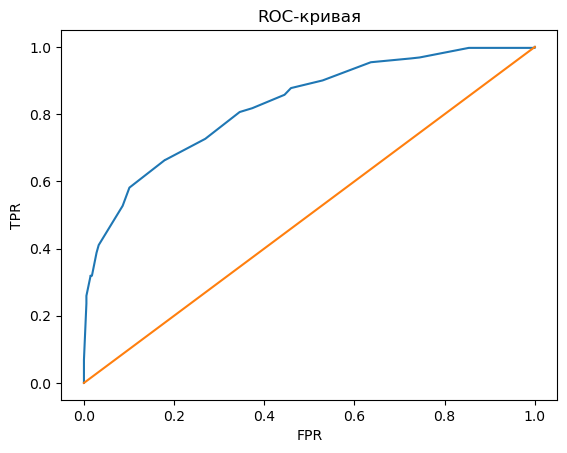

In [26]:
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

При балансировке классов значение f1-меры снижается для модели дерева решений (по сравнению с результатам не несбалансированных данных). Однако модель стала находить больше истинно положительных значений  (что релевантно для нашей задачи, где требуется выявить именно тех, кто прекращает сотрудничать с банком).

In [27]:
#v2:
f1_fin = 0
auc_roc_fin = 0
fin_depth = 0
fin_est = 0
fin_features = 0

for depth in range(1,6):
    for est in range(30,101,10):
        for feature in range(5,11):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, 
                                           max_features = feature, class_weight='balanced', random_state=12345)
            model.fit(sc_features_train, target_train)
            predictions = model.predict(sc_features_valid)
                      
            f1 = f1_score(target_valid, predictions)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            auc_roc = roc_auc_score(target_valid, probas_ones)
        
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_est = est
                fin_features = feature

print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, n_estimators - {fin_est}')

#v1:
#model = RandomForestClassifier(random_state=12345, n_estimators=10, class_weight='balanced')
#model.fit(sc_features_train, target_train)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5698
AUC-ROC: 0.8508
Гиперпараметры: max_depth - 5, max_features - 5, n_estimators - 60


In [28]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1218,  250],
       [ 116,  235]], dtype=int64)

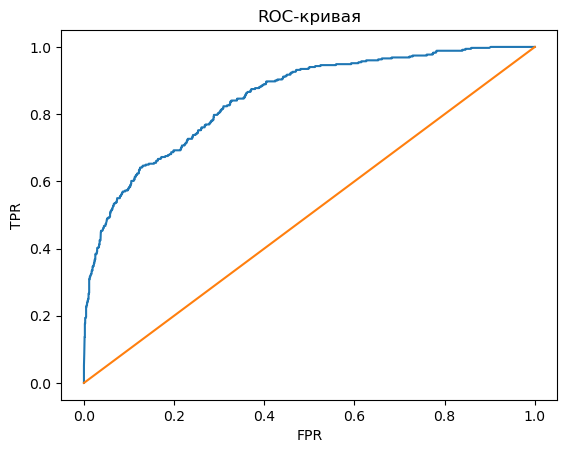

In [29]:
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

Модель случайного леса имеет более высокие значения метрик F1 мера и AUC-ROC, чем модель решающего дерева. 
F1 мера и AUC-ROC случайного леса выше с использование балансировки классов, чем без нее. Кроме того, на 60% выросло количество истинно положительных предсказаний.

Невысокое значение F1 при высокой AUC-ROC могут говорить о том, что с подбором порога классификации качество модели может повыситься.


Таким образом, при использовании сбалансированных весов классов значения F1 мера и AUC-ROC снижаются у дерева решений и повышаются у случайного леса относительно значений метрик моделей, построенных без учета дисбаланса.



### Увеличение выборки

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_fin = pd.concat([features_zeros] + [features_ones]*repeat)
    target_fin = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_fin, target_fin = shuffle(features_fin, target_fin, random_state=12345)
    
    return features_fin, target_fin

In [31]:
features_upsampled, target_upsampled = upsample(sc_features_train, target_train, 4)
print(features_upsampled.shape)
print(target_upsampled.shape)

(8832, 10)
(8832,)


Проверим сбалансированность классов на увеличенной выборке:

In [32]:
target_upsampled.value_counts()

1    4504
0    4328
Name: Exited, dtype: int64

In [33]:
#v2:
fin_depth = 0
fin_features = 0
fin_nodes = 0
f1_fin = 0
auc_roc_fin = 0

for depth in range(1,6):
    for feature in range(1,11):
        for nodes in range(1000,2000,50):
            model = DecisionTreeClassifier(max_depth=depth, max_features=feature, max_leaf_nodes=nodes, random_state=12345)
            model.fit(features_upsampled, target_upsampled)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            f1 = f1_score(target_valid, model.predict(sc_features_valid))
            auc_roc = roc_auc_score(target_valid, probas_ones)
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_features = feature
                fin_nodes = nodes
                
print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, max_leaf_nodes - {nodes}')

#v1:
#model = DecisionTreeClassifier(random_state=12345)
#model.fit(features_upsampled, target_upsampled)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5489
AUC-ROC: 0.8268
Гиперпараметры: max_depth - 5, max_features - 10, max_leaf_nodes - 1950


In [34]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1203,  265],
       [ 118,  233]], dtype=int64)

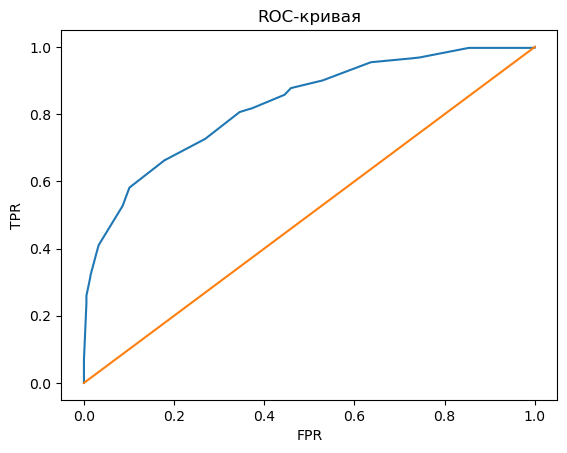

In [35]:
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

Увеличение выборки позволяет достичь такого же уровня f1-меры, как балансировка классов. 

In [36]:
#v2:
f1_fin = 0
auc_roc_fin = 0
fin_depth = 0
fin_est = 0
fin_features = 0

for depth in range(1,6):
    for est in range(30,101,10):
        for feature in range(1,11):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, max_features = feature, random_state=12345)
            model.fit(features_upsampled, target_upsampled)
            predictions = model.predict(sc_features_valid)
                      
            f1 = f1_score(target_valid, predictions)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            auc_roc = roc_auc_score(target_valid, probas_ones)
        
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_est = est
                fin_features = feature

print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, n_estimators - {fin_est}')

#v1:
#model = RandomForestClassifier(random_state=12345)
#model.fit(features_upsampled, target_upsampled)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5646
AUC-ROC: 0.8535
Гиперпараметры: max_depth - 5, max_features - 3, n_estimators - 90


In [37]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1200,  268],
       [ 115,  236]], dtype=int64)

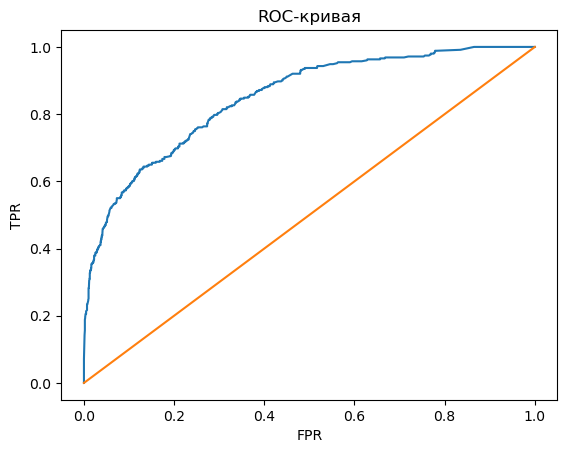

In [38]:
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

У модели случайного леса метрика f1-мера немного снижается относительно значений, получаемых при балансировке классов (с 0,5698 до 0,5646), а AUC ROC увеличивается (с 0,8508 до 0,8535).

### Уменьшениие выборки

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_fin = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_fin = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_fin, target_fin = shuffle(features_fin, target_fin, random_state=12345)
    
    return features_fin, target_fin    

In [40]:
#v2:
features_downsampled, target_downsampled = downsample(sc_features_train, target_train, \
     data.loc[data.loc[:,'Exited']==1]['Exited'].count()/data.loc[data.loc[:,'Exited']==0]['Exited'].count())

#v1:
#features_downsampled, target_downsampled = downsample(sc_features_train, target_train, 0.3)
print(features_downsampled.shape)
print(target_downsampled.shape)

(2235, 10)
(2235,)


Сбалансированность классов на уменьшенной выборке:

In [41]:
target_downsampled.value_counts()

1    1126
0    1109
Name: Exited, dtype: int64

In [42]:
#v2:
fin_depth = 0
fin_features = 0
fin_nodes = 0
f1_fin = 0
auc_roc_fin = 0

for depth in range(1,6):
    for feature in range(1,11):
        for nodes in range(1000,2000,50):
            model = DecisionTreeClassifier(max_depth=depth, max_features=feature, max_leaf_nodes=nodes, random_state=12345)
            model.fit(features_downsampled, target_downsampled)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            f1 = f1_score(target_valid, model.predict(sc_features_valid))
            auc_roc = roc_auc_score(target_valid, probas_ones)
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_features = feature
                fin_nodes = nodes
                
print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, max_leaf_nodes - {nodes}')

#v1:
#model = DecisionTreeClassifier(random_state=12345)
#model.fit(features_downsampled, target_downsampled)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5502
AUC-ROC: 0.8285
Гиперпараметры: max_depth - 5, max_features - 10, max_leaf_nodes - 1950


In [43]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1184,  284],
       [ 110,  241]], dtype=int64)

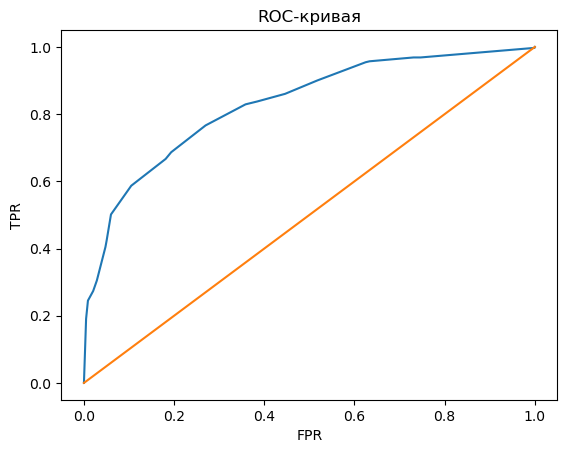

In [44]:
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

На уменьшенной выборке значение f1-мера и ROC AUC с модели решающего дерева получается самое высокое, а также самое большое количество истинно положительных предсказаний (однако и самое большое ложноположительных). 

In [45]:
#v2:
f1_fin = 0
auc_roc_fin = 0
fin_depth = 0
fin_est = 0
fin_features = 0

for depth in range(1,6):
    for est in range(30,101,10):
        for feature in range(5,11):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, max_features = feature, random_state=12345)
            model.fit(features_downsampled, target_downsampled)
            predictions = model.predict(sc_features_valid)
                      
            f1 = f1_score(target_valid, predictions)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            auc_roc = roc_auc_score(target_valid, probas_ones)
        
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_est = est
                fin_features = feature

print(f'F1-мера:', f1_fin.round(4))
print('AUC-ROC:', auc_roc_fin.round(4))
print(f'Гиперпараметры: max_depth - {fin_depth}, max_features - {fin_features}, n_estimators - {fin_est}')

#v1:
#model = RandomForestClassifier(random_state=12345)
#model.fit(features_downsampled, target_downsampled)
#probas = model.predict_proba(sc_features_valid)
#probas_ones = probas[:,1]
#print(f'F1-мера:', (f1_score(target_valid, model.predict(sc_features_valid))).round(4))
#print('AUC-ROC:', (roc_auc_score(target_valid, probas_ones)).round(4))

F1-мера: 0.5651
AUC-ROC: 0.8524
Гиперпараметры: max_depth - 5, max_features - 9, n_estimators - 100


In [46]:
confusion_matrix(target_valid, model.predict(sc_features_valid))

array([[1122,  346],
       [  82,  269]], dtype=int64)

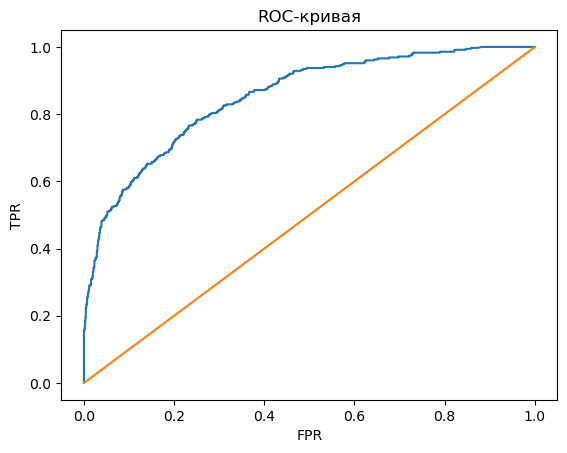

In [47]:
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

F1-мера алгоритма случайного леса на уменьшенной выборке выше, чем на увеличенной (0,5651 против 0,5646), но ниже, чем при использовании весов классов (0,5698). Высокое значение AUC ROC указывает на то, что f1 мера может быть увеличена подбором порога классификации.

Таким образом, самые высокие значения f1 меры получились у модели случайного леса при использовании весов классов. Используем ее для дальнейшей донастройки гиперпараметров и подбора порога классификации.

### Изменение порога классификации

In [48]:
depth_list = []
fin_estimators_list = []
f1_list = []
auc_roc_list = []
f1_fin = 0
auc_roc_fin = 0
auc_roc_best = 0
fin_depth = 0
fin_est = 0
fin_features = 0
fin_model = None

for depth in range(4,9):
    for est in range(40,91,5):
        for feature in range(1,11):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, class_weight='balanced', max_features = feature, random_state=12345)
            model.fit(sc_features_train, target_train)
            predictions = model.predict(sc_features_valid)
                      
            f1 = f1_score(target_valid, predictions)
            probas = model.predict_proba(sc_features_valid)
            probas_ones = probas[:,1]
            auc_roc = roc_auc_score(target_valid, probas_ones)
            
            depth_list.append(depth)
            fin_estimators_list.append(est)
            f1_list.append(f1)
            auc_roc_list.append(auc_roc)
        
            if f1 > f1_fin:
                f1_fin = f1
                auc_roc_fin = auc_roc
                fin_depth = depth
                fin_est = est
                fin_features = feature
                fin_model = model
                
            if auc_roc > auc_roc_best:
                auc_roc_best = auc_roc
    
print(f'Параметры итоговой модели: Глубина - {fin_depth}, Количество деревьев - {fin_est},\
Количество признаков - {fin_features}, F1-мера - {f1_fin.round(4)}, AUC_ROC - {auc_roc_fin.round(4)}')
print(f'Лучшее значение AUC_ROC - {auc_roc_best.round(4)}') 

KeyboardInterrupt: 

In [ ]:
rforest_results = pd.DataFrame({
    'depth':depth_list,
    'n_estimators':fin_estimators_list,
    'f1_score':f1_list,
    'auc_roc':auc_roc_list
})
#rforest_results 

Гиперпараметры, при которых достигаются самые высокие значения f1-меры:

In [ ]:
rforest_results.sort_values(by='f1_score', ascending=False).head() 

Гиперпараметры, при которых достигаются самые высокие значения AUC ROC:

In [ ]:
rforest_results.sort_values(by='auc_roc', ascending=False).head() 

In [ ]:
f1_mins = rforest_results.groupby('depth')['f1_score'].min()
f1_maxes = rforest_results.groupby('depth')['f1_score'].max()

x = range(4,9)
y1 = f1_mins
y2 = f1_maxes
fig, ax = plt.subplots()
plt.xlim(4,8)
ax.fill_between(x, y1, y2, alpha=.5, linewidth=1)
ax.plot(x, (y1 + y2)/2, linewidth=2)
ax.set_title('Изменение f1 меры при разной глубине дерева')
ax.set_ylabel('F1-мера')
ax.set_xlabel('Глубина дерева решений');

In [ ]:
auc_roc_mins = rforest_results.groupby('depth')['auc_roc'].min()
auc_roc_maxes = rforest_results.groupby('depth')['auc_roc'].max()
x = range(4,9)
fig, ax = plt.subplots()
plt.xlim(4,8)
y1 = auc_roc_mins
y2 = auc_roc_maxes
ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)
ax.set_title('Изменение AUC ROC при разной глубине дерева')
ax.set_ylabel('AUC ROC')
ax.set_xlabel('Глубина дерева решений');

In [ ]:
f1_mins = rforest_results.groupby('n_estimators')['f1_score'].min()
f1_maxes = rforest_results.groupby('n_estimators')['f1_score'].max()

x = range(40,91,5)
y1 = f1_mins
y2 = f1_maxes
fig, ax = plt.subplots()
#plt.xlim(1,10)
ax.fill_between(x, y1, y2, alpha=.5, linewidth=1)
ax.plot(x, (y1 + y2)/2, linewidth=2)
ax.set_title('Изменение f1 меры при разном кол-ве деревьев')
ax.set_ylabel('F1 мера')
ax.set_xlabel('Количество деревьев');

In [ ]:
auc_roc_mins = rforest_results.groupby('n_estimators')['auc_roc'].min()
auc_roc_maxes = rforest_results.groupby('n_estimators')['auc_roc'].max()
x = range(40,91,5)
fig, ax = plt.subplots()
#plt.xlim(1,5)
y1 = auc_roc_mins
y2 = auc_roc_maxes
ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)
ax.set_title('Изменение AUC ROC меры при разном кол-ве деревьев')
ax.set_ylabel('AUC ROC')
ax.set_xlabel('Количество деревьев');

Т.к. интересующая нас метрика - F1-мера, выбираем модель с наивысшим значением данной метрики.

In [ ]:
model = RandomForestClassifier(max_depth=8, n_estimators=60, class_weight='balanced', max_features = 1, random_state=12345)
model.fit(sc_features_train, target_train)
probas = model.predict_proba(sc_features_valid)
probas_ones_valid = probas[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probas_ones_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая');

In [ ]:
threshold_best = 0
f1_best = 0

for threshold in np.arange(0, 1, 0.02):
    probas = model.predict_proba(sc_features_valid)
    probas_ones_valid = probas[:,1]
    predictions = probas_ones_valid > threshold  
    f1 = f1_score(target_valid, predictions)
    auc_roc = roc_auc_score(target_valid, probas_ones_valid)
    print(f'Порог = {threshold},  F1-мера = {f1.round(4)}')
    if f1>f1_best:
        f1_best = f1
        threshold_best = threshold

In [ ]:
print(f'Порог классификации: {threshold_best}')
print(f'f1-мера: {f1_best.round(4)}')

Таким образом, лучшие значения f1 меры и AUC ROC позволяет достичь модель случайного леса при глубине дерева - 8, количестве деревьев - 60, количестве признаков для разбиения -1 и пороге классификации - 0,52.

## Тестирование модели

In [ ]:
test_predictions = model.predict(sc_features_test)
probas_predictions = model.predict_proba(sc_features_test)
probas_ones_valid = probas_predictions[:,1]
predictions = probas_ones_valid > threshold_best 
     
f1 = f1_score(target_test, predictions)
auc_roc = roc_auc_score(target_test, probas_ones_valid)
print(f'F1-мера: {f1.round(4)}')
print(f'AUC-ROC: {auc_roc.round(4)}')

На тестовой выборке модель показывает даже большие значения f1 меры и AUC ROC, чем на валидационных данных.

## Выводы

В качестве модели для прогноза оттока клиентов лучшие результаты показал алгоритм **случайного леса** с гиперпараметрами:
  - глубина дерева - 8, 
  - вес класса - 'balanced',
  - число признаков для разделения - 1,
  - количество деревьев - 60 и 
  - порог классификации - 0,52.

Модель позволяет достичь значение f1-меры в **0.5993 на валидационной** выборке и **0.6093 - на тестовой**.

